### Student Information
Name:陳煒展

Student ID:1711206015

GitHub ID:Weichan-Chen

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here#####

In [21]:
#載入所需要的套件
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\marsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
#載入資料並檢視資料
url = "https://raw.githubusercontent.com/leoson-wu/DM2025-Lab1-Exercise/main/newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(url)

df.shape, df.columns.tolist()


((847, 16),
 ['type',
  'datetime',
  'post_id',
  'subreddit',
  'title',
  'author',
  'url',
  'upvotes',
  'downvotes',
  'upvote_ratio',
  'text',
  'subjectivity',
  'polarity',
  'sentiment',
  'entities',
  'label'])

In [6]:
#檢視前10筆資料的title and text
for t in df["title"][0:10]:
 print(t)

Retardation is on the menu boys! WSB is so back
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Who knows more? $VMAR
The Trump administration is begging Xi Jinping to call Trump quickly.
Weekend Discussion Thread for the Weekend of April 11, 2025
Is the market in complete denial right now?
Retardation is on the menu boys! WSB is so back
It's fucking awful seeing the "Silver" misinformation campaign everywhere I look
Any cheap stocks under $10?


In [7]:
for t in df["text"][0:10]:
 print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.
Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.

**Highlight Main Points**

* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.
* The feat highlights the power of electric boating and pushes the limits of innovation.
* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.

**TLDR**

Hold onto your seats – Vision Marine Technologies Inc. and Shaun Torrente have shattered the water-speed re

In [8]:
#選取所需要的欄位
usecols = ["title","text","label"]
df=df[usecols]
df

,title,text,label
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.0
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,-1.0
...,...,...,...
842,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,1.0
843,$ U.S. dollar value (crashing),Where can I read this?,0.0
844,Analyst Recommendations,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0
845,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,-1.0


In [9]:
#check missing values
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [10]:
#check duplicat Data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [11]:
sum(df.duplicated())

23

In [12]:
#處理缺失值
df.drop_duplicates(keep = False,inplace = True)
len(df)

813

label
-1    315
 0    391
 1    107
Name: count, dtype: int64


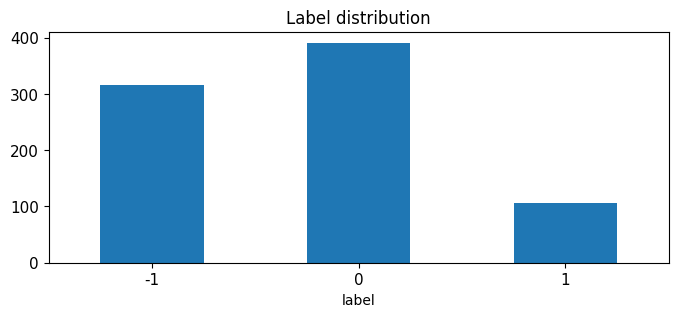

In [13]:
#plot barchart for df
counts = df["label"].value_counts(dropna=False)
counts = counts.reindex([-1,0,1])
print(counts)
ax = counts.plot(kind = 'bar',
          title = "Label distribution",
          rot = 0, fontsize = 11, figsize = (8,3))

In [19]:
#將title 與 text 兩欄結合
df['text_all'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df.head()

,title,text,label,text_all
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,Retardation is on the menu boys! WSB is so bac...
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.0,Retail giant TARGET has now declined for 10 co...
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,How do you feel about a sitting president maki...
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,Who knows more? $VMAR Vision Marine Technologi...
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,-1.0,The Trump administration is begging Xi Jinping...


In [20]:
df['unigrams'] =df["text_all"].apply(lambda x: dmh.tokenize_text(x))
df[0:5]

,title,text,label,text_all,unigrams
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,Retardation is on the menu boys! WSB is so bac...,"[Retardation, is, on, the, menu, boys, !, WSB,..."
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.0,Retail giant TARGET has now declined for 10 co...,"[Retail, giant, TARGET, has, now, declined, fo..."
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,How do you feel about a sitting president maki...,"[How, do, you, feel, about, a, sitting, presid..."
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,Who knows more? $VMAR Vision Marine Technologi...,"[Who, knows, more, ?, $, VMAR, Vision, Marine,..."
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,-1.0,The Trump administration is begging Xi Jinping...,"[The, Trump, administration, is, begging, Xi, ..."


In [22]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.text_all) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(3335))	1
  (np.int32(0), np.int32(2199))	2
  (np.int32(0), np.int32(2781))	2
  (np.int32(0), np.int32(3957))	1
  (np.int32(0), np.int32(2535))	1
  (np.int32(0), np.int32(631))	1
  (np.int32(0), np.int32(4433))	1
  (np.int32(0), np.int32(3644))	1
  (np.int32(0), np.int32(462))	1
  (np.int32(0), np.int32(719))	1
  (np.int32(0), np.int32(3337))	1


In [23]:
count_vect.get_feature_names_out()[3335]

'retardation'

In [24]:
X_counts.shape

(813, 4474)

In [25]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '04', '06', '08', '10'],
      dtype=object)

In [26]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [27]:
count_vect.get_feature_names_out()[9:10]

array(['10'], dtype=object)

# Phase 2

In [ ]:
### Begin Assignment Here